# Geodesic Bending in a Degree‑19 Tetrakis Lattice

This minimal notebook builds a $30\times30$ patch of the right‑isosceles tetrakis‑square tiling with **row/column uniqueness constraints only** (degree 19 graph).  
We then remove one internal edge (a +45° wedge deficit) to model a point mass and visualise how the graph‑geodesic distance from a source deviates from circular symmetry.

> Author: Mike Lawrenchuk (auto‑generated demo)


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

def build_degree19_sheet(n=30):
    """Return NetworkX graph for n×n tetrakis patch with degree 19 rules."""
    tri = [(r, c, q) for r in range(n) for c in range(n) for q in 'ABCD']
    G = nx.Graph()
    G.add_nodes_from(tri)

    def clique(vs):
        for i, v in enumerate(vs):
            for w in vs[i+1:]:
                G.add_edge(v, w)

    # intra-cell 4‑cliques
    for r, c in product(range(n), repeat=2):
        clique([(r, c, q) for q in 'ABCD'])

    # row & column constraints (same quadrant)
    for r in range(n):
        for q in 'ABCD':
            clique([(r, c, q) for c in range(n)])
    for c in range(n):
        for q in 'ABCD':
            clique([(r, c, q) for r in range(n)])

    return G

# Build graph and inject curvature by removing one edge
G = build_degree19_sheet()
G.remove_edge((15, 15, 'A'), (15, 15, 'B'))   # +45° wedge at centre

# Choose source vertex
source = (0, 0, 'A')
print(f"Vertices: {G.number_of_nodes()}, edges: {G.number_of_edges()}")


Vertices: 3600, edges: 109799


In [2]:
# Compute geodesic distances from the source
dists = nx.single_source_shortest_path_length(G, source)

# Extract planar coordinates for plotting
xs, ys, ds = [], [], []
for (r, c, q), d in dists.items():
    # Use square centres as coordinates; offset triangles slightly for visibility
    offset = {'A':( -0.25,  0.25),
              'B':(  0.25,  0.25),
              'C':( -0.25, -0.25),
              'D':(  0.25, -0.25)}[q]
    xs.append(c + offset[0])
    ys.append(r + offset[1])
    ds.append(d)

print("Max graph distance in window:", max(ds))


Max graph distance in window: 3


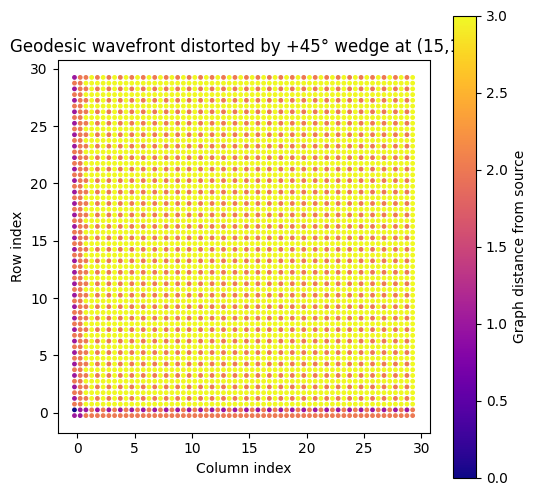

In [3]:
plt.figure(figsize=(6,6))
sc = plt.scatter(xs, ys, c=ds, s=6, cmap='plasma')
plt.colorbar(sc, label='Graph distance from source')
plt.gca().set_aspect('equal')
plt.title('Geodesic wavefront distorted by +45° wedge at (15,15)')
plt.xlabel('Column index'); plt.ylabel('Row index')
plt.show()
